# Predictive Modeling of Top 50 Canadian Stocks (2010–Present)
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview

This project aims to develop a **robust and interpretable predictive system** for the top 50 Canadian stocks, utilizing historical data from 2010 to the present. The goal is to generate actionable insights for investment decision-making while adhering to **industry best practices** and **regulatory standards**.

### Objectives
- Predict future stock price movements or returns for the top 50 Canadian stocks.
- Ensure **model interpretability** for regulatory compliance.
- Build a **pipeline** that supports continuous deployment and monitoring.
- Benchmark predictions against standard market indices to evaluate performance.

### Data Description
The dataset includes daily historical stock prices for 50 major Canadian companies. Each column represents a stock's closing price, and the `Date` column provides the corresponding trading day.

**Columns:**
- Date
- TD.TO, SHOP.TO, RY.TO, BNS.TO, ABX.TO, BMO.TO, CM.TO, L.TO, NA.TO, FNV.TO, G.TO, TRP.TO, WPM.TO, AC.TO, CVE.TO, BHC.TO, CNQ.TO, WN.TO, SU.TO, ENB.TO, MG.TO, K.TO, IMO.TO, SLF.TO, EMA.TO, QSR.TO, DOL.TO, CP.TO, MFC.TO, MRU.TO, POW.TO, FVI.TO, LSPD.TO, FTS.TO, TOU.TO, ATZ.TO, CMG.TO, DPM.TO, GSY.TO, DOO.TO, FM.TO

### Methodology

The project will be executed following a structured, step-by-step workflow:

1. **Problem Definition**
   - Define predictive goals (regression or classification).
   - Establish evaluation metrics and constraints.

2. **Exploratory Data Analysis (EDA)**
   - Understand data distributions, trends, and correlations.
   - Identify anomalies and patterns in stock prices.

3. **Feature Engineering**
   - Compute returns, log-returns, and lag features.
   - Create technical indicators (MA, EMA, RSI, MACD, Bollinger Bands).
   - Include volatility measures and cross-stock correlations.

4. **Target Definition**
   - Define prediction target (next-day price, return, or direction).

5. **Data Preprocessing**
   - Handle missing values.
   - Scale or normalize features.
   - Split data into training, validation, and test sets (time-aware).

6. **Model Selection**
   - Evaluate tree-based models (LightGBM, XGBoost) for accuracy and interpretability.
   - Optionally explore time-series models (ARIMA, Prophet) or hybrid approaches (LSTM + tree models).
   - Establish baseline models (linear regression, logistic regression).

7. **Model Training and Validation**
   - Train models with time-series cross-validation.
   - Tune hyperparameters.
   - Evaluate performance using appropriate metrics.

8. **Interpretability and Compliance**
   - Apply SHAP for feature importance and individual prediction explanations.
   - Generate summary and waterfall plots for transparency.

9. **Deployment Pipeline**
   - Automate data ingestion, feature computation, prediction, and reporting.
   - Monitor model performance and detect drift.

10. **Backtesting and Benchmarking**
    - Evaluate strategy performance with historical data.
    - Compare against benchmarks (e.g., S&P/TSX Composite Index).

11. **Documentation and Reporting**
    - Maintain detailed notebooks and visualizations.
    - Provide regulatory-ready explanations for all predictions.

### Expected Outcomes
- A **robust predictive system** for stock price movements.
- **Transparent and explainable predictions** suitable for regulatory review.
- **Actionable investment insights** and performance benchmarks.
- A **production-ready pipeline** capable of updating predictions daily.

---

This notebook will implement the above methodology **step-by-step**, starting from data loading, preprocessing, feature engineering, modeling, interpretability, and finally deployment-ready insights.


In [1]:
# Import Libraries and Packages

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Time series processing
from datetime import datetime, timedelta

# Technical indicators
import ta  # Technical Analysis library for stocks

# Machine learning models
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import lightgbm as lgb
import xgboost as xgb

# Model explainability
import shap

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Set visualization style
sns.set(style="whitegrid")


In [2]:
# Load Dataset and Initial Inspection

# Load the CSV dataset
file_path = "top_50_canadian_stocks_data_since_2010.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Display first 5 rows
print("\nFirst 5 Rows of the Dataset:")
display(df.head())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
display(df.isnull().sum())


Dataset Shape: (3919, 41)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3919 entries, 2010-01-04 to 2025-08-14
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TD.TO    3919 non-null   float64
 1   SHOP.TO  2569 non-null   float64
 2   RY.TO    3919 non-null   float64
 3   BNS.TO   3919 non-null   float64
 4   ABX.TO   3919 non-null   float64
 5   BMO.TO   3919 non-null   float64
 6   CM.TO    3919 non-null   float64
 7   L.TO     3919 non-null   float64
 8   NA.TO    3919 non-null   float64
 9   FNV.TO   3919 non-null   float64
 10  G.TO     1100 non-null   float64
 11  TRP.TO   3919 non-null   float64
 12  WPM.TO   3919 non-null   float64
 13  AC.TO    3857 non-null   float64
 14  CVE.TO   3919 non-null   float64
 15  BHC.TO   3919 non-null   float64
 16  CNQ.TO   3919 non-null   float64
 17  WN.TO    3919 non-null   float64
 18  SU.TO    3919 non-null   float64
 19  ENB.TO   3919 non-null   float6

,TD.TO,SHOP.TO,RY.TO,BNS.TO,ABX.TO,BMO.TO,CM.TO,L.TO,NA.TO,FNV.TO,...,FVI.TO,LSPD.TO,FTS.TO,TOU.TO,ATZ.TO,CMG.TO,DPM.TO,GSY.TO,DOO.TO,FM.TO
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,17.787426,NaN,30.658152,23.447275,31.911797,28.280378,16.095985,20.827080,15.880476,23.984436,...,2.34,NaN,15.970577,NaN,NaN,2.113551,3.281360,5.630202,NaN,15.362132
2010-01-05,17.616709,NaN,30.187077,23.107052,32.215153,28.017683,15.814014,20.728924,15.872527,24.186399,...,2.48,NaN,15.875813,NaN,NaN,2.113551,3.334715,5.611184,NaN,15.562148
2010-01-06,17.443277,NaN,29.965061,22.771606,32.745983,27.578167,15.741173,20.526476,15.899026,24.969048,...,2.45,NaN,15.925987,NaN,NaN,2.113551,3.334715,5.427313,NaN,16.474382
2010-01-07,17.291525,NaN,29.992142,22.479294,32.336483,27.320524,15.708273,20.636906,15.610193,25.398247,...,2.65,NaN,15.820066,NaN,NaN,2.113551,3.308038,5.420974,NaN,16.179028
2010-01-08,17.269850,NaN,29.938000,22.742847,32.412323,27.148762,15.774069,20.986578,15.541302,25.482405,...,2.78,NaN,15.998451,NaN,NaN,2.113551,3.334715,5.420974,NaN,17.188467



Summary Statistics:


,TD.TO,SHOP.TO,RY.TO,BNS.TO,ABX.TO,BMO.TO,CM.TO,L.TO,NA.TO,FNV.TO,...,FVI.TO,LSPD.TO,FTS.TO,TOU.TO,ATZ.TO,CMG.TO,DPM.TO,GSY.TO,DOO.TO,FM.TO
count,3919.000000,2569.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,...,3919.000000,1616.000000,3919.000000,3695.000000,2225.000000,3919.000000,3919.000000,3919.000000,3070.000000,3919.000000
mean,48.915105,67.338493,75.714205,46.037517,22.372967,70.397008,39.026834,66.627008,51.801250,101.206185,...,5.418206,37.711866,35.232120,28.654932,30.161602,6.437296,6.057073,54.983900,56.255328,18.141849
std,21.485538,58.038821,39.180677,14.181664,7.917426,32.826112,18.475032,47.512347,32.123546,60.782584,...,1.881882,28.792170,14.099185,17.764090,15.787925,2.244181,3.844276,57.343050,30.596653,7.088473
min,16.733295,2.681000,25.325577,21.372335,6.584859,26.360664,14.841203,20.156452,14.727118,21.375593,...,1.890000,11.180000,14.648939,4.704662,10.250000,1.926450,0.755869,3.628952,13.370780,2.445613
25%,29.792105,14.022000,44.307766,33.750372,15.945598,42.878286,24.933374,30.996475,26.374723,46.677002,...,4.140000,20.112501,20.981903,15.639387,16.990000,4.675252,2.983459,11.309661,26.395278,13.072409
50%,47.312565,50.259998,69.950264,48.051579,21.480669,65.755363,36.132252,49.181694,42.473843,85.095711,...,5.030000,25.120000,32.515900,21.797398,24.790001,6.602688,5.538815,26.463408,49.242250,17.538509
75%,70.716171,109.643997,108.579235,56.486191,27.305956,103.822819,50.036041,84.310265,79.356873,163.849808,...,6.410000,40.117498,48.019117,35.550358,42.419998,7.768617,7.887671,101.727909,86.510456,21.662997
max,102.989998,213.981995,188.610001,78.220001,42.298111,157.759995,102.000000,233.519287,149.929993,246.710007,...,12.280000,158.929993,70.099998,69.323181,76.940002,14.252813,24.219999,210.009995,121.399818,44.409351



Missing Values per Column:


TD.TO         0
SHOP.TO    1350
RY.TO         0
BNS.TO        0
ABX.TO        0
BMO.TO        0
CM.TO         0
L.TO          0
NA.TO         0
FNV.TO        0
G.TO       2819
TRP.TO        0
WPM.TO        0
AC.TO        62
CVE.TO        0
BHC.TO        0
CNQ.TO        0
WN.TO         0
SU.TO         0
ENB.TO        0
MG.TO         0
K.TO          0
IMO.TO        0
SLF.TO        0
EMA.TO        0
QSR.TO     1242
DOL.TO        0
CP.TO         0
MFC.TO        0
MRU.TO        0
POW.TO        0
FVI.TO        0
LSPD.TO    2303
FTS.TO        0
TOU.TO      224
ATZ.TO     1694
CMG.TO        0
DPM.TO        0
GSY.TO        0
DOO.TO      849
FM.TO         0
dtype: int64

In [3]:
# Handle Missing Values

# Threshold for dropping columns (e.g., >30% missing)
drop_threshold = 0.3 * len(df)

# Drop columns with excessive missing values
cols_to_drop = df.columns[df.isnull().sum() > drop_threshold]
print("Columns dropped due to excessive missing values:", list(cols_to_drop))
df.drop(columns=cols_to_drop, inplace=True)

# Impute remaining missing values with forward-fill, then backward-fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Imputation:")
display(df.isnull().sum())


Columns dropped due to excessive missing values: ['SHOP.TO', 'G.TO', 'QSR.TO', 'LSPD.TO', 'ATZ.TO']

Missing Values After Imputation:


TD.TO     0
RY.TO     0
BNS.TO    0
ABX.TO    0
BMO.TO    0
CM.TO     0
L.TO      0
NA.TO     0
FNV.TO    0
TRP.TO    0
WPM.TO    0
AC.TO     0
CVE.TO    0
BHC.TO    0
CNQ.TO    0
WN.TO     0
SU.TO     0
ENB.TO    0
MG.TO     0
K.TO      0
IMO.TO    0
SLF.TO    0
EMA.TO    0
DOL.TO    0
CP.TO     0
MFC.TO    0
MRU.TO    0
POW.TO    0
FVI.TO    0
FTS.TO    0
TOU.TO    0
CMG.TO    0
DPM.TO    0
GSY.TO    0
DOO.TO    0
FM.TO     0
dtype: int64

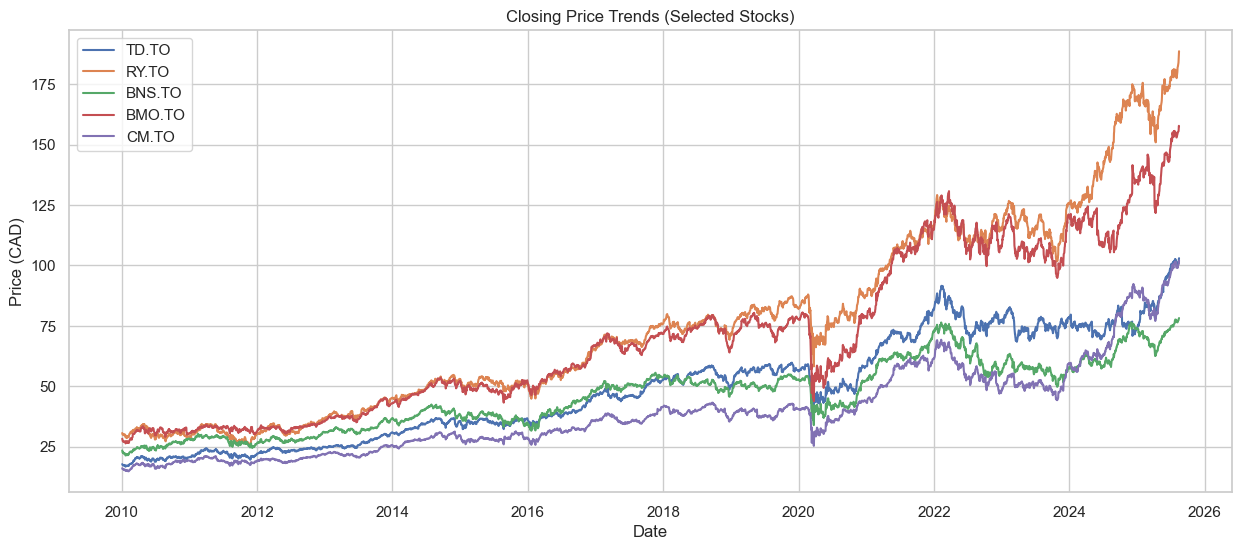

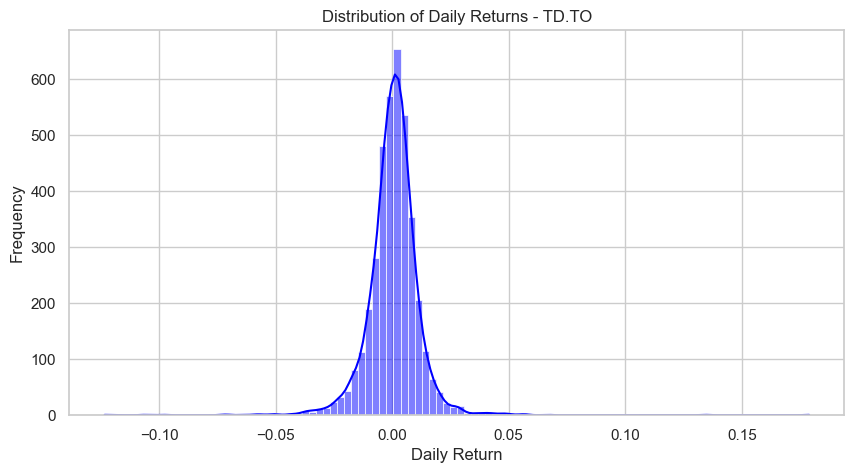

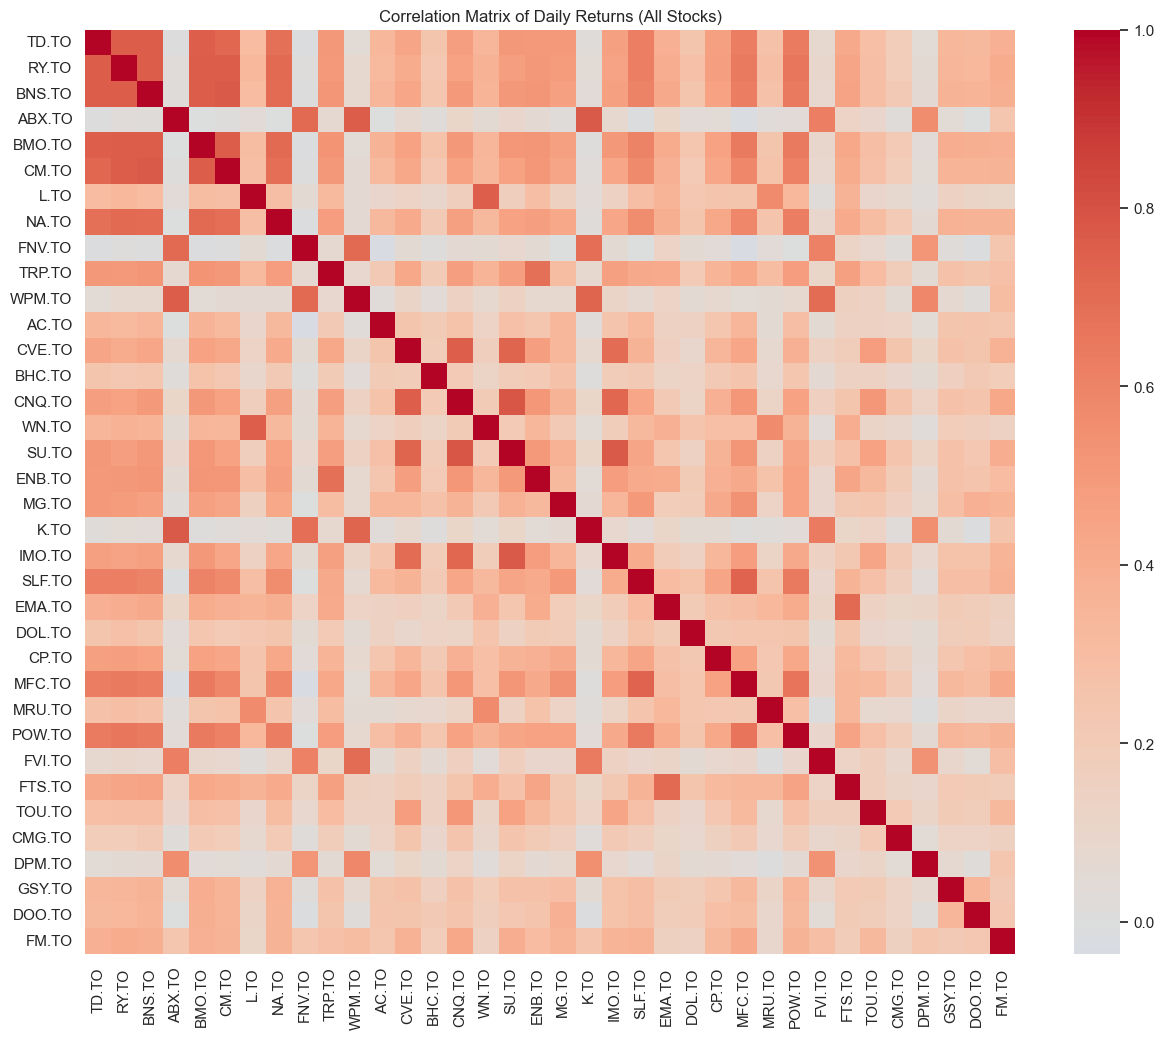

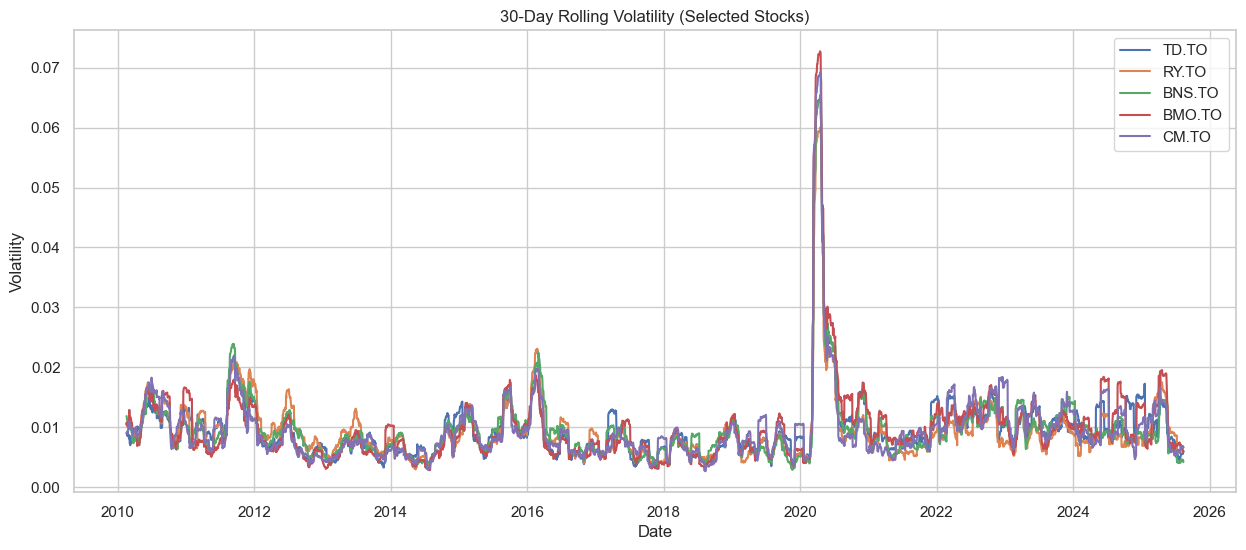

In [4]:
# Exploratory Data Analysis (EDA)

# 1. Plot closing price trends for selected stocks
sample_stocks = ['TD.TO', 'RY.TO', 'BNS.TO', 'BMO.TO', 'CM.TO']  # pick representative stocks
plt.figure(figsize=(15,6))
for stock in sample_stocks:
    plt.plot(df.index, df[stock], label=stock)
plt.title("Closing Price Trends (Selected Stocks)")
plt.xlabel("Date")
plt.ylabel("Price (CAD)")
plt.legend()
plt.show()

# 2. Compute daily returns for all stocks
returns = df.pct_change().dropna()

# 3. Plot distribution of daily returns for one stock
plt.figure(figsize=(10,5))
sns.histplot(returns['TD.TO'], bins=100, kde=True, color='blue')
plt.title("Distribution of Daily Returns - TD.TO")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# 4. Correlation heatmap of returns
plt.figure(figsize=(15,12))
sns.heatmap(returns.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix of Daily Returns (All Stocks)")
plt.show()

# 5. Rolling volatility (30-day rolling std) for selected stocks
plt.figure(figsize=(15,6))
for stock in sample_stocks:
    plt.plot(returns[stock].rolling(window=30).std(), label=stock)
plt.title("30-Day Rolling Volatility (Selected Stocks)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


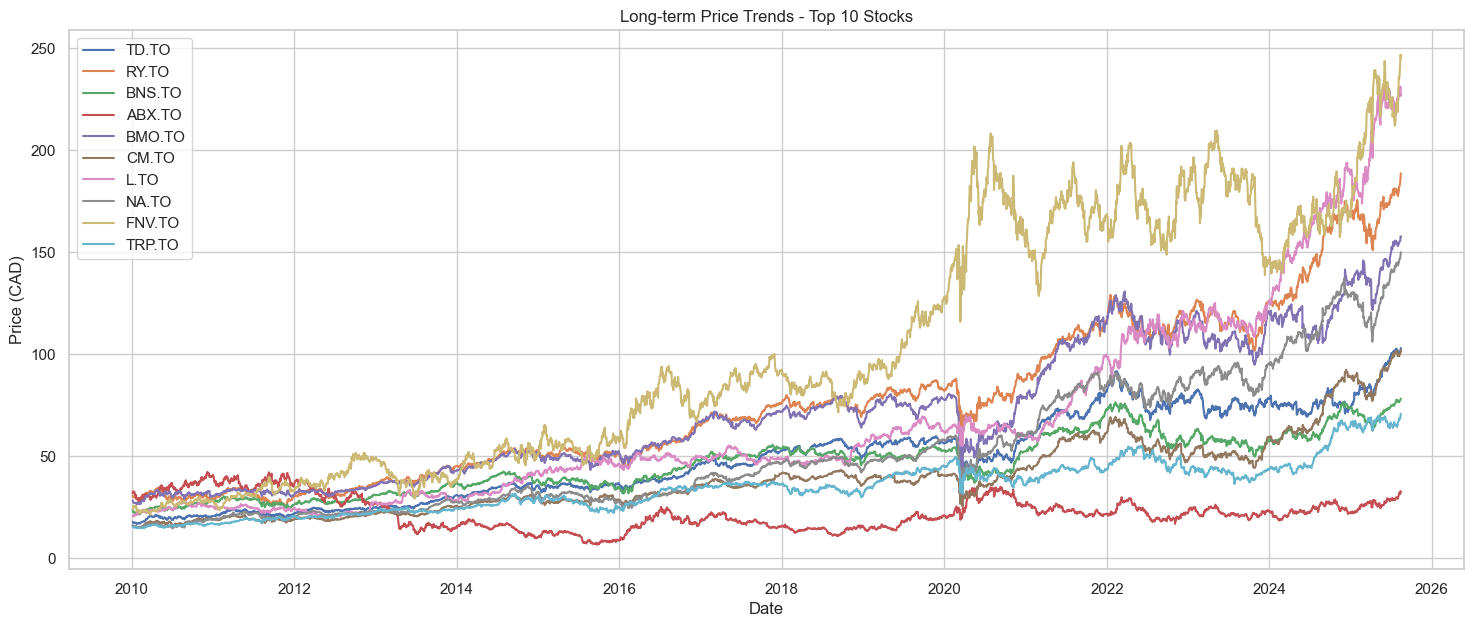

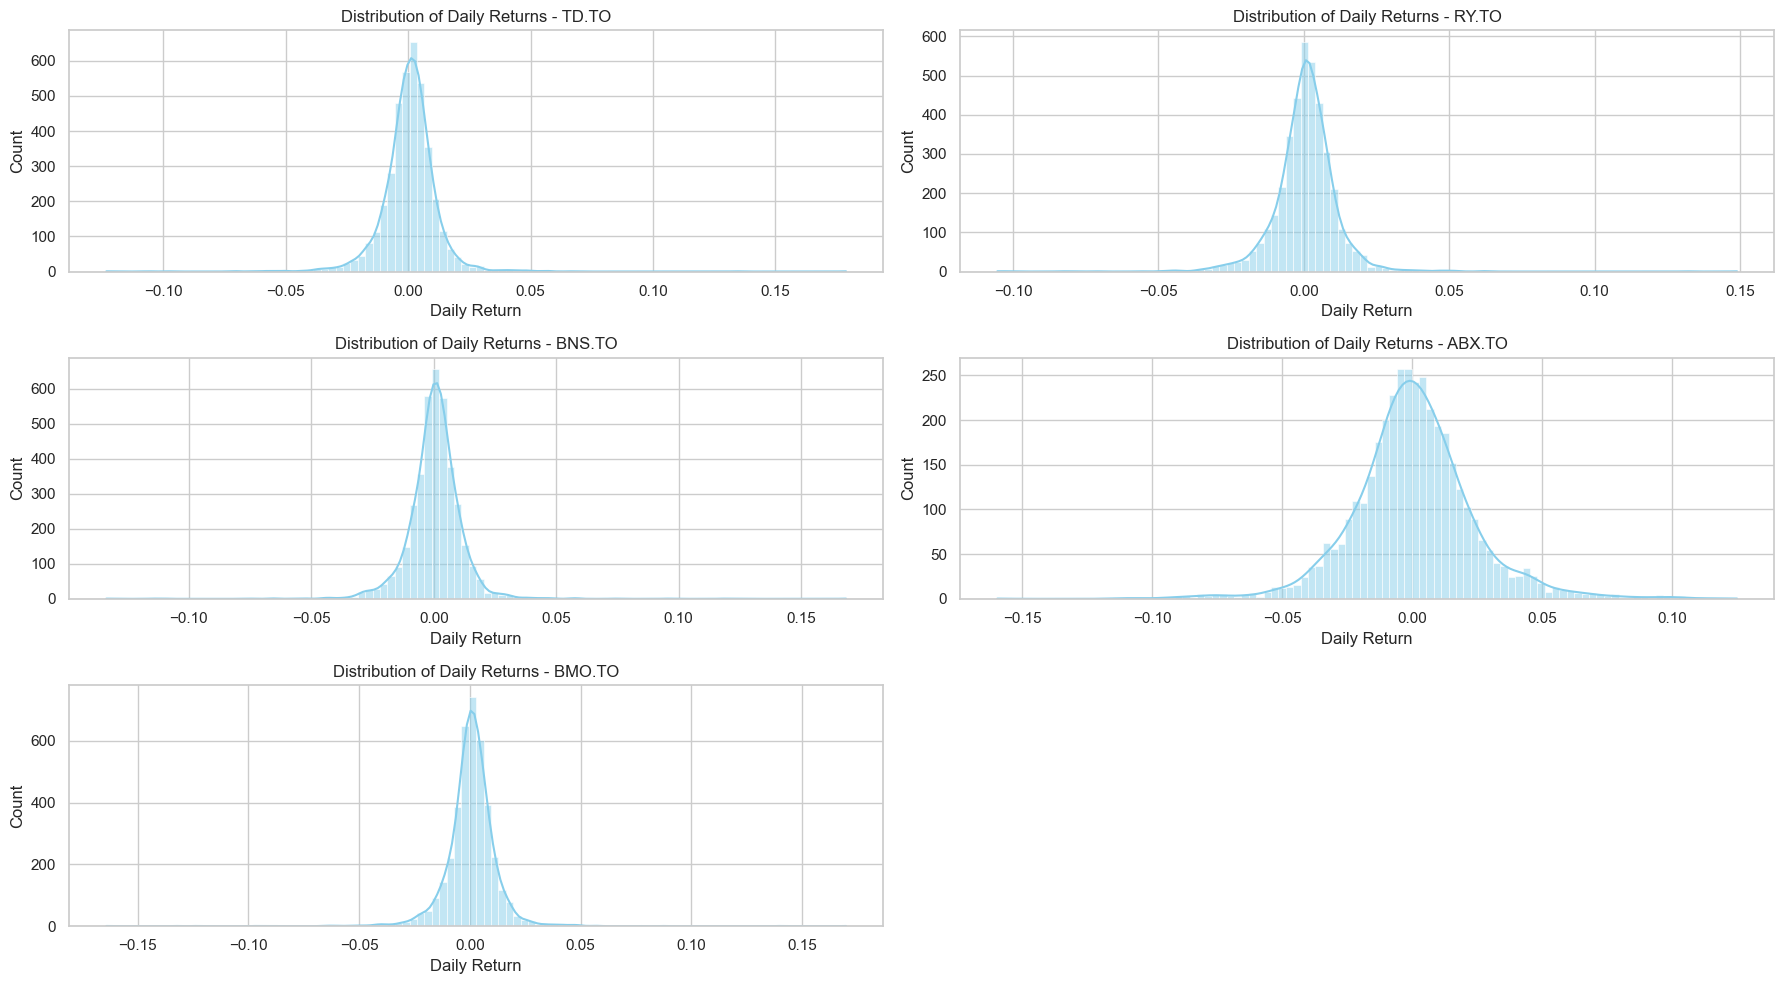

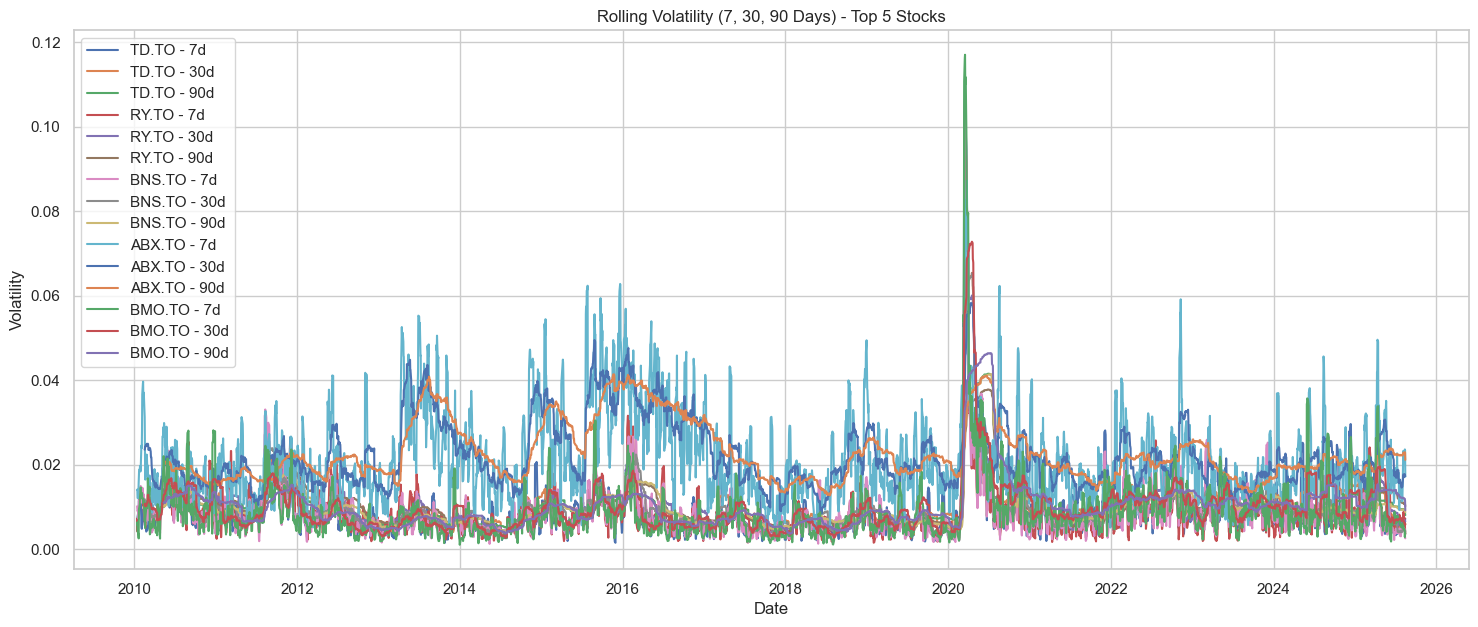

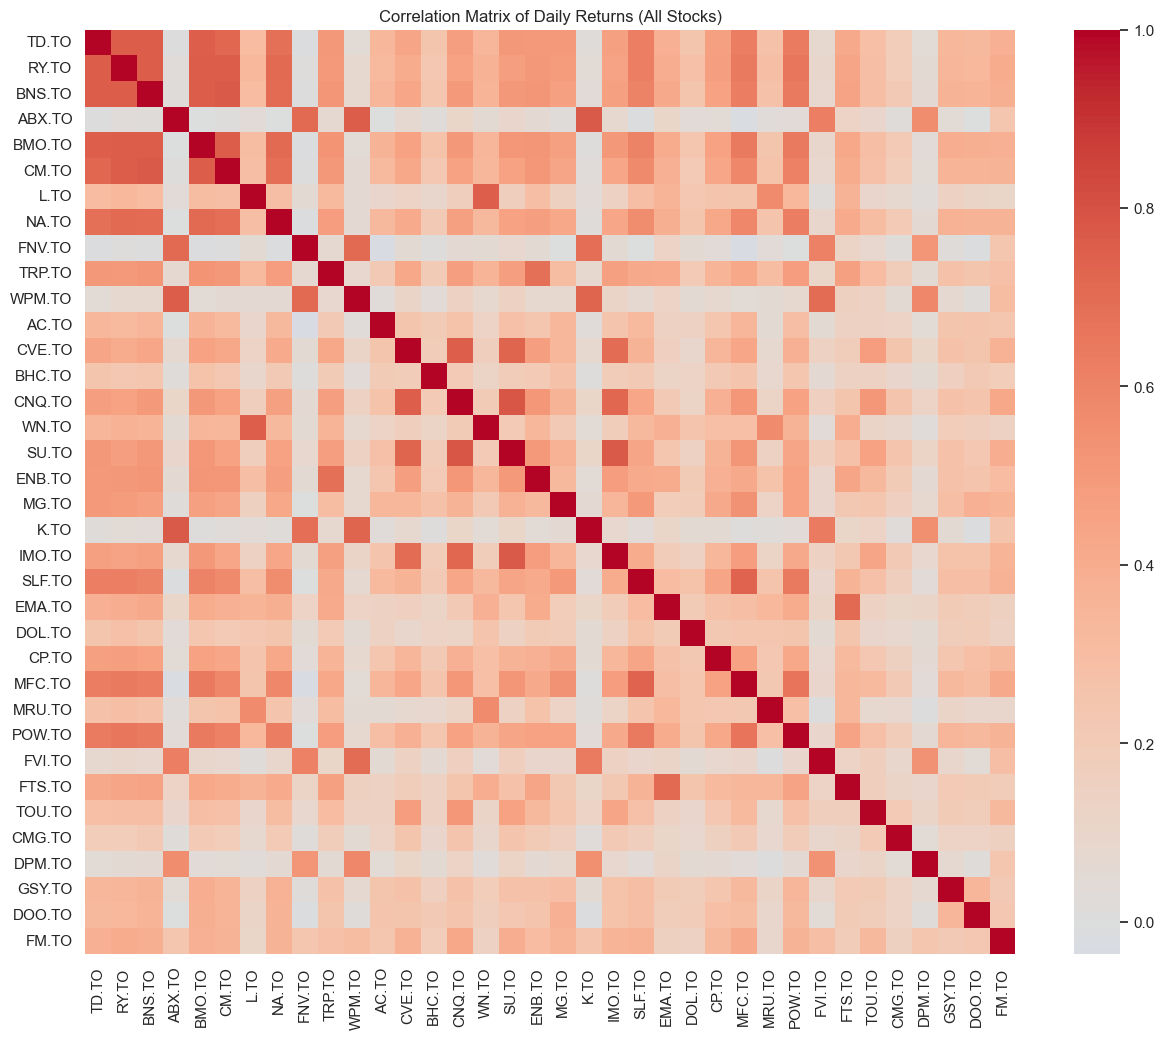

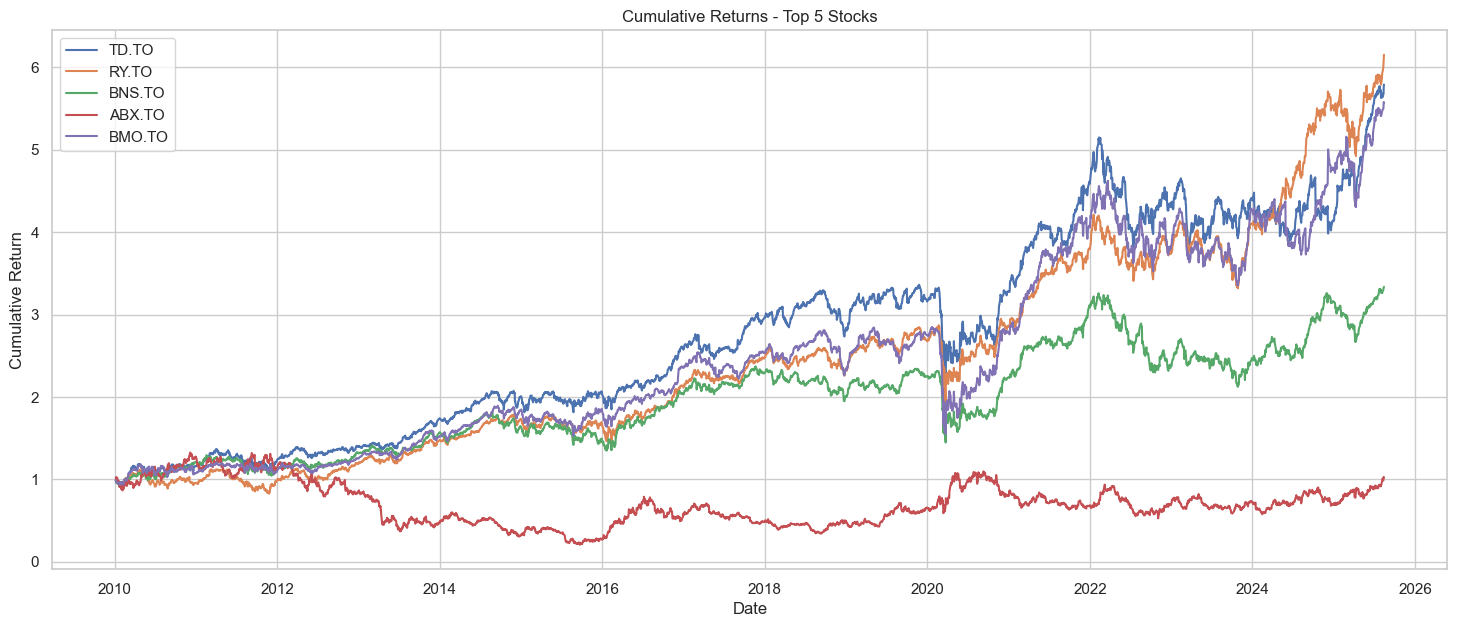

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
TD.TO,3918.0,0.000512,0.011294,-0.123300,-0.004249,0.000916,0.005804,0.178820,0.479841,31.081661
RY.TO,3918.0,0.000522,0.010832,-0.105383,-0.004273,0.000847,0.005859,0.148964,0.323300,22.853932
BNS.TO,3918.0,0.000371,0.011276,-0.133721,-0.004506,0.000706,0.005623,0.168378,0.149465,29.737533
ABX.TO,3918.0,0.000284,0.023589,-0.159649,-0.012195,0.000000,0.012246,0.124851,0.082336,3.278364
BMO.TO,3918.0,0.000509,0.011872,-0.164134,-0.004037,0.000770,0.005823,0.169752,-0.496870,36.589409
CM.TO,3918.0,0.000537,0.011460,-0.171335,-0.004147,0.000849,0.005602,0.189578,0.022502,43.817178
L.TO,3918.0,0.000678,0.011637,-0.105618,-0.005548,0.000303,0.006456,0.136905,0.470574,13.312806
NA.TO,3918.0,0.000648,0.012238,-0.167577,-0.004017,0.000892,0.005908,0.195714,0.526667,44.707976
FNV.TO,3918.0,0.000783,0.019476,-0.105341,-0.009818,0.000616,0.010971,0.115911,0.121987,3.034007
TRP.TO,3918.0,0.000478,0.013386,-0.218558,-0.005342,0.000750,0.007016,0.199516,-0.339912,38.923929


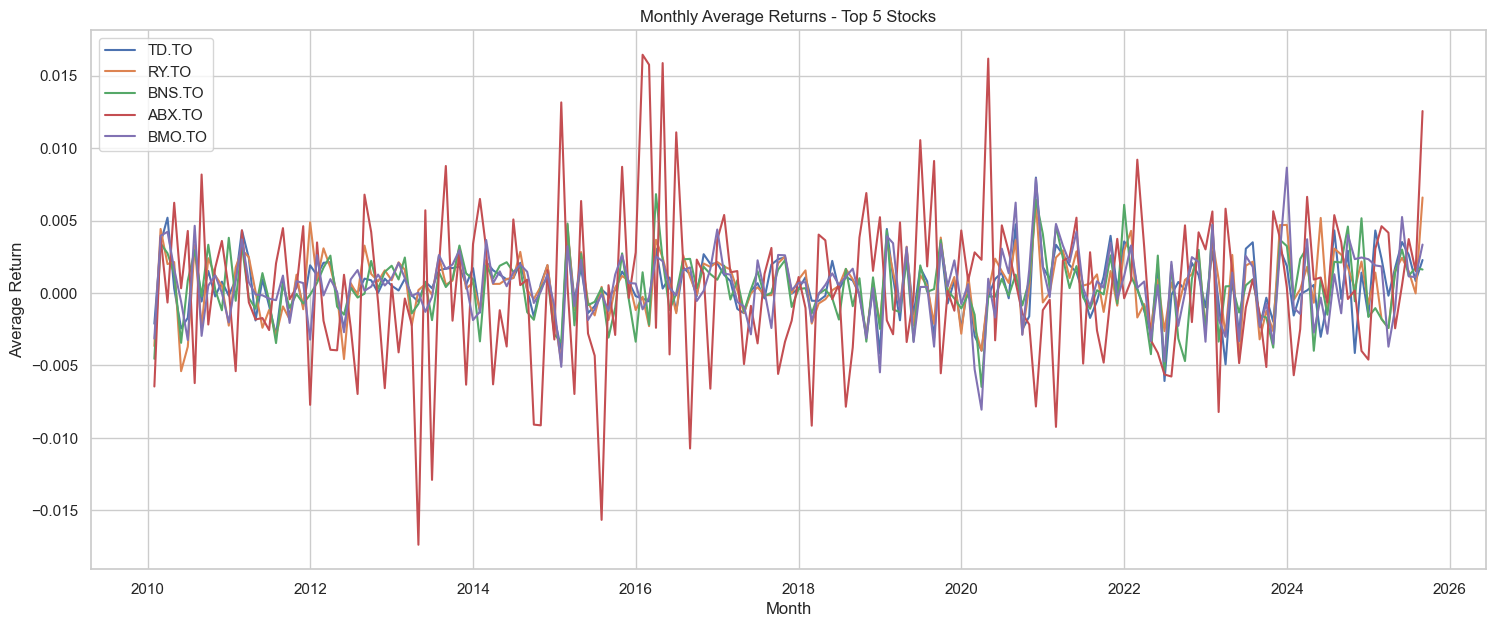

In [5]:
# Comprehensive EDA for Top Canadian Stocks

import matplotlib.dates as mdates

# 1. Plot long-term price trends for top 10 stocks
top_10_stocks = df.columns[:10]
plt.figure(figsize=(18,7))
for stock in top_10_stocks:
    plt.plot(df.index, df[stock], label=stock)
plt.title("Long-term Price Trends - Top 10 Stocks")
plt.xlabel("Date")
plt.ylabel("Price (CAD)")
plt.legend()
plt.show()

# 2. Compute daily returns for all stocks
returns = df.pct_change().dropna()

# 3. Plot histograms and KDE for returns of top 5 stocks
plt.figure(figsize=(18,10))
for i, stock in enumerate(top_10_stocks[:5]):
    plt.subplot(3,2,i+1)
    sns.histplot(returns[stock], bins=100, kde=True, color='skyblue')
    plt.title(f"Distribution of Daily Returns - {stock}")
    plt.xlabel("Daily Return")
plt.tight_layout()
plt.show()

# 4. Rolling volatility (7, 30, 90 days) for top 5 stocks
plt.figure(figsize=(18,7))
for stock in top_10_stocks[:5]:
    plt.plot(returns[stock].rolling(7).std(), label=f"{stock} - 7d")
    plt.plot(returns[stock].rolling(30).std(), label=f"{stock} - 30d")
    plt.plot(returns[stock].rolling(90).std(), label=f"{stock} - 90d")
plt.title("Rolling Volatility (7, 30, 90 Days) - Top 5 Stocks")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# 5. Correlation heatmap of daily returns (all stocks)
plt.figure(figsize=(15,12))
sns.heatmap(returns.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix of Daily Returns (All Stocks)")
plt.show()

# 6. Cumulative returns for top 5 stocks
cumulative_returns = (1 + returns[top_10_stocks[:5]]).cumprod()
plt.figure(figsize=(18,7))
for stock in top_10_stocks[:5]:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.title("Cumulative Returns - Top 5 Stocks")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# 7. Descriptive statistics of returns
desc_stats = returns.describe().T
desc_stats['skew'] = returns.skew()
desc_stats['kurtosis'] = returns.kurtosis()
display(desc_stats)

# 8. Monthly average returns (seasonality check)
monthly_returns = returns.resample('M').mean()
plt.figure(figsize=(18,7))
for stock in top_10_stocks[:5]:
    plt.plot(monthly_returns.index, monthly_returns[stock], label=stock)
plt.title("Monthly Average Returns - Top 5 Stocks")
plt.xlabel("Month")
plt.ylabel("Average Return")
plt.legend()
plt.show()


In [6]:
# Feature Engineering  
import ta

# Make a copy of the original price columns
price_df = df.copy()

# 1. Compute daily returns and log returns
returns = price_df.pct_change().dropna()
log_returns = np.log(price_df / price_df.shift(1)).dropna()

# Initialize new DataFrame for features
feature_df = pd.DataFrame(index=price_df.index)

# 2. Lag features (1-day, 5-day, 10-day)
lag_days = [1, 5, 10]
for stock in price_df.columns:
    for lag in lag_days:
        feature_df[f"{stock}_lag{lag}"] = price_df[stock].pct_change(lag)

# 3. Technical indicators (use ta library)
for stock in price_df.columns:
    # Moving averages
    feature_df[f"{stock}_MA10"] = price_df[stock].rolling(window=10).mean()
    feature_df[f"{stock}_MA20"] = price_df[stock].rolling(window=20).mean()
    # Exponential moving averages
    feature_df[f"{stock}_EMA10"] = price_df[stock].ewm(span=10, adjust=False).mean()
    feature_df[f"{stock}_EMA20"] = price_df[stock].ewm(span=20, adjust=False).mean()
    # RSI
    feature_df[f"{stock}_RSI14"] = ta.momentum.RSIIndicator(price_df[stock], window=14).rsi()
    # Bollinger Bands
    bb = ta.volatility.BollingerBands(price_df[stock], window=20, window_dev=2)
    feature_df[f"{stock}_BB_High"] = bb.bollinger_hband()
    feature_df[f"{stock}_BB_Low"] = bb.bollinger_lband()
    # MACD
    macd = ta.trend.MACD(price_df[stock])
    feature_df[f"{stock}_MACD"] = macd.macd()
    feature_df[f"{stock}_MACD_Signal"] = macd.macd_signal()
    # Rolling volatility
    feature_df[f"{stock}_vol7"] = price_df[stock].pct_change().rolling(window=7).std()
    feature_df[f"{stock}_vol30"] = price_df[stock].pct_change().rolling(window=30).std()

# 4. Drop rows with NaNs only after all features are created
feature_df.dropna(inplace=True)

print("Feature Engineering Completed. Dataset shape:", feature_df.shape)


Feature Engineering Completed. Dataset shape: (3886, 504)


In [7]:

# Define Target Variable (Next-Day Direction)

# Choose stock for prediction (example: TD.TO)
target_stock = "TD.TO"

# Compute next-day return
next_day_return = df[target_stock].pct_change().shift(-1)

# Define target: 1 = price up, 0 = price down or unchanged
target = (next_day_return > 0).astype(int)

# Align features and target
feature_df = feature_df.iloc[:-1, :]  # drop last row as it has no next-day
target = target.iloc[:-1]

print("Target variable defined. Target distribution:")
print(target.value_counts(normalize=True))


Target variable defined. Target distribution:
TD.TO
1    0.546708
0    0.453292
Name: proportion, dtype: float64


In [8]:
# Train/Test Split and Feature Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Since it's time series, we avoid random shuffling
split_ratio = 0.8
split_index = int(len(feature_df) * split_ratio)

X_train = feature_df.iloc[:split_index, :]
X_test = feature_df.iloc[split_index:, :]

y_train = target.iloc[:split_index]
y_test = target.iloc[split_index:]

# Feature scaling (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train/Test split completed.")
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


Train/Test split completed.
X_train shape: (3108, 504)
X_test shape: (777, 504)
y_train distribution:
 TD.TO
1    0.545367
0    0.454633
Name: proportion, dtype: float64
y_test distribution:
 TD.TO
1    0.551852
0    0.448148
Name: proportion, dtype: float64


In [12]:
# Align target with feature_df index
target_aligned = target.loc[feature_df.index]

# Split train/test
split_ratio = 0.8
split_index = int(len(feature_df) * split_ratio)

X_train = feature_df.iloc[:split_index, :]
X_test = feature_df.iloc[split_index:, :]

y_train = target_aligned.iloc[:split_index]
y_test = target_aligned.iloc[split_index:]

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train/Test split completed. X_train shape:", X_train_scaled.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


Train/Test split completed. X_train shape: (3108, 504)
y_train distribution:
 TD.TO
1    0.54408
0    0.45592
Name: proportion, dtype: float64
y_test distribution:
 TD.TO
1    0.558559
0    0.441441
Name: proportion, dtype: float64


In [13]:
# LightGBM Classifier Training 

import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Prepare LightGBM dataset
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

# Set hyperparameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

# Train the model with early stopping using callbacks
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
)

# Predictions
y_pred_prob = lgb_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.470528	valid_1's binary_logloss: 0.716881
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.670505	valid_1's binary_logloss: 0.685576
Accuracy: 0.5598455598455598
Precision: 0.5606860158311345
Recall: 0.9792626728110599
F1 Score: 0.7130872483221476

Confusion Matrix:
 [[ 10 333]
 [  9 425]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.03      0.06       343
           1       0.56      0.98      0.71       434

    accuracy                           0.56       777
   macro avg       0.54      0.50      0.38       777
weighted avg       0.55      0.56      0.42       777



In [14]:
# Handle Class Imbalance with scale_pos_weight

# Compute scale_pos_weight
num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
scale_pos_weight = num_neg / num_pos

print("Scale_pos_weight:", scale_pos_weight)

# Update LightGBM parameters
params_imbalance = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1,
    'scale_pos_weight': scale_pos_weight
}

# Retrain LightGBM
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data)

lgb_model_balanced = lgb.train(
    params_imbalance,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
)

# Predictions
y_pred_prob = lgb_model_balanced.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Scale_pos_weight: 0.8379657007687759
Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.469288	valid_1's binary_logloss: 0.721077
Early stopping, best iteration is:
[1]	training's binary_logloss: 0.682599	valid_1's binary_logloss: 0.686183
Accuracy: 0.5585585585585585
Precision: 0.5585585585585585
Recall: 1.0
F1 Score: 0.7167630057803468

Confusion Matrix:
 [[  0 343]
 [  0 434]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.56      1.00      0.72       434

    accuracy                           0.56       777
   macro avg       0.28      0.50      0.36       777
weighted avg       0.31      0.56      0.40       777



In [15]:
# Handle Class Imbalance with SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Resampled training set shape:", X_train_res.shape)
print("Resampled class distribution:\n", pd.Series(y_train_res).value_counts())

# Retrain LightGBM on resampled data
train_data_res = lgb.Dataset(X_train_res, label=y_train_res)
test_data_res = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data_res)

lgb_model_smote = lgb.train(
    params,
    train_data_res,
    num_boost_round=500,
    valid_sets=[train_data_res, test_data_res],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
)

# Predictions
y_pred_prob = lgb_model_smote.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Resampled training set shape: (3382, 504)
Resampled class distribution:
 TD.TO
0    1691
1    1691
Name: count, dtype: int64
Training until validation scores don't improve for 50 rounds
[50]	training's binary_logloss: 0.470527	valid_1's binary_logloss: 0.726561
Early stopping, best iteration is:
[3]	training's binary_logloss: 0.673617	valid_1's binary_logloss: 0.691787
Accuracy: 0.5263835263835264
Precision: 0.5953757225433526
Recall: 0.47465437788018433
F1 Score: 0.5282051282051282

Confusion Matrix:
 [[203 140]
 [228 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.59      0.52       343
           1       0.60      0.47      0.53       434

    accuracy                           0.53       777
   macro avg       0.53      0.53      0.53       777
weighted avg       0.54      0.53      0.53       777



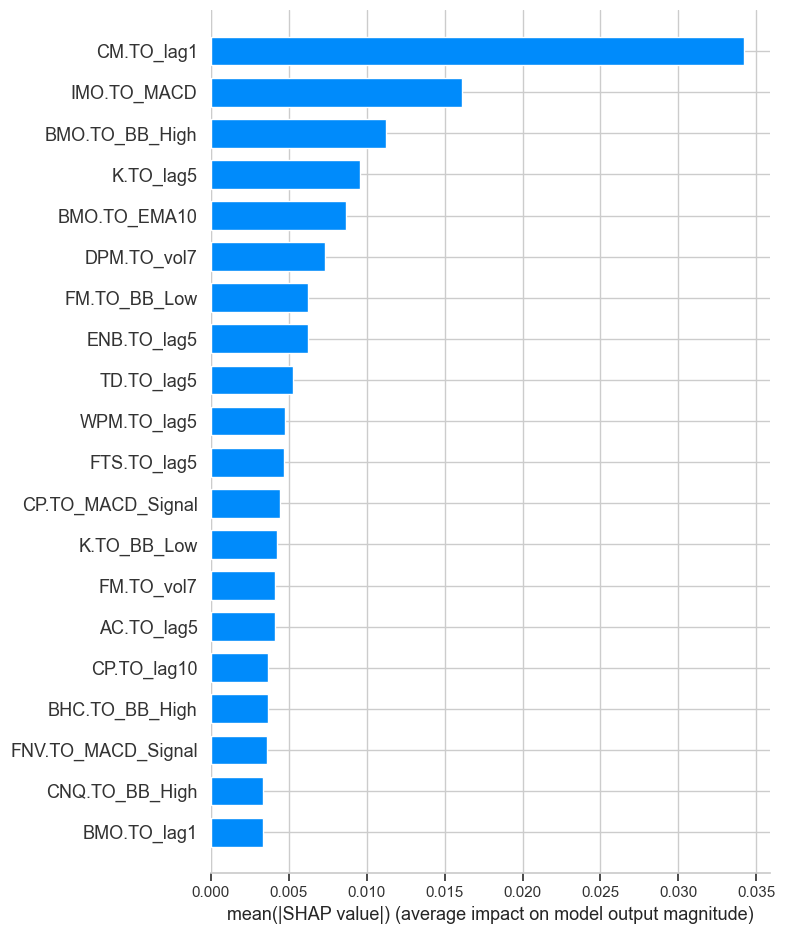

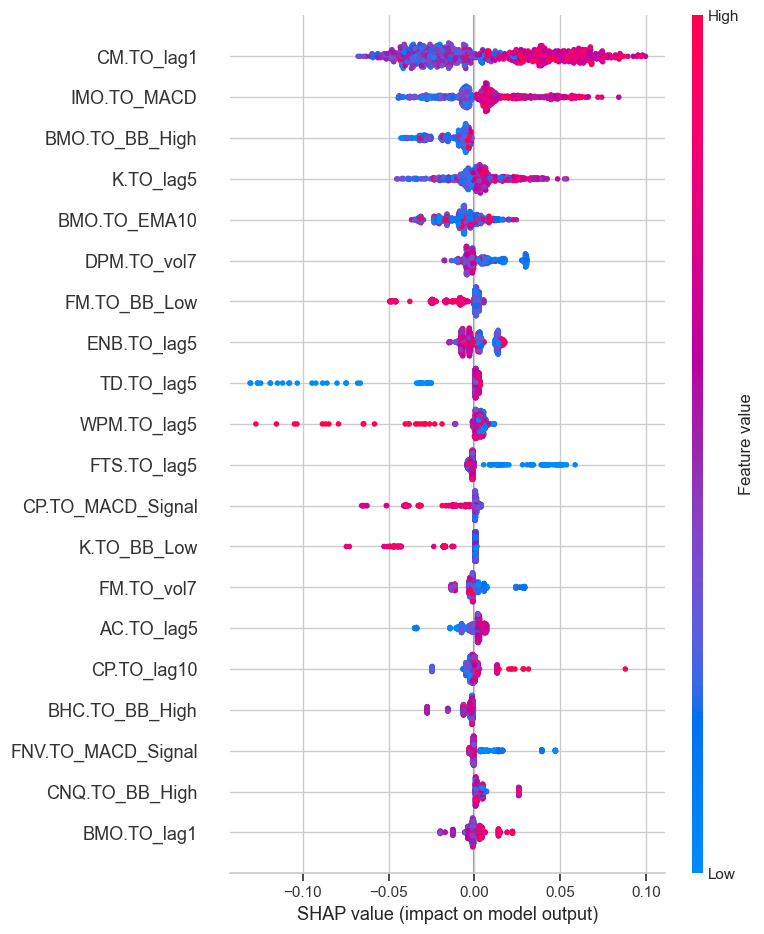

In [16]:
# SHAP Explainability for SMOTE-Balanced Model

import shap

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(lgb_model_smote)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot (bar chart) for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed summary plot (beeswarm) for feature effects
shap.summary_plot(shap_values, X_test)


In [18]:
# Hyperparameter Tuning with Optunal
import optuna
from sklearn.metrics import f1_score

def objective(trial):
    param = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'metric': 'binary_logloss',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 5),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 5),
        'verbose': -1
    }

    # LightGBM datasets
    train_data_opt = lgb.Dataset(X_train_res, label=y_train_res)
    valid_data_opt = lgb.Dataset(X_test_scaled, label=y_test, reference=train_data_opt)

    # Train model (no verbose_eval, use callback)
    model = lgb.train(
        param,
        train_data_opt,
        num_boost_round=500,
        valid_sets=[train_data_opt, valid_data_opt],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]  # period=0 disables logs
    )

    # Predictions
    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluate F1-score
    return f1_score(y_test, y_pred)

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best trial parameters:", study.best_trial.params)
print("Best F1 Score:", study.best_value)


[I 2025-08-21 23:31:08,440] A new study created in memory with name: no-name-467009c0-5f71-4b42-98bf-5a7b755aff30


Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:10,978] Trial 0 finished with value: 0.2945990180032733 and parameters: {'learning_rate': 0.060172253580657954, 'num_leaves': 92, 'max_depth': 8, 'min_data_in_leaf': 44, 'feature_fraction': 0.9077601784109661, 'bagging_fraction': 0.6536935311042554, 'bagging_freq': 7, 'lambda_l1': 2.1212308782718257, 'lambda_l2': 4.869637862094903}. Best is trial 0 with value: 0.2945990180032733.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.68863	valid_1's binary_logloss: 0.694383
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:12,933] Trial 1 finished with value: 0.4968152866242038 and parameters: {'learning_rate': 0.07890890413985438, 'num_leaves': 35, 'max_depth': 12, 'min_data_in_leaf': 86, 'feature_fraction': 0.801951266661838, 'bagging_fraction': 0.7835939404795699, 'bagging_freq': 4, 'lambda_l1': 1.750459019411776, 'lambda_l2': 3.5334228453562155}. Best is trial 1 with value: 0.4968152866242038.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.687395	valid_1's binary_logloss: 0.693604
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:14,696] Trial 2 finished with value: 0.5421245421245421 and parameters: {'learning_rate': 0.12151428108840995, 'num_leaves': 58, 'max_depth': 4, 'min_data_in_leaf': 98, 'feature_fraction': 0.6560817594705358, 'bagging_fraction': 0.9277291125054459, 'bagging_freq': 4, 'lambda_l1': 4.975640314039416, 'lambda_l2': 2.2017804752385035}. Best is trial 2 with value: 0.5421245421245421.


Early stopping, best iteration is:
[5]	training's binary_logloss: 0.670935	valid_1's binary_logloss: 0.690862
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:18,650] Trial 3 finished with value: 0.5413173652694611 and parameters: {'learning_rate': 0.06067608659578478, 'num_leaves': 69, 'max_depth': 11, 'min_data_in_leaf': 37, 'feature_fraction': 0.7197174533157262, 'bagging_fraction': 0.8218396134269115, 'bagging_freq': 10, 'lambda_l1': 1.955048210719272, 'lambda_l2': 1.9781423200138126}. Best is trial 2 with value: 0.5421245421245421.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.684785	valid_1's binary_logloss: 0.692626
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:22,907] Trial 4 finished with value: 0.5563549160671463 and parameters: {'learning_rate': 0.021946533940372673, 'num_leaves': 83, 'max_depth': 10, 'min_data_in_leaf': 51, 'feature_fraction': 0.7298574822443209, 'bagging_fraction': 0.9119417847200901, 'bagging_freq': 7, 'lambda_l1': 1.0874792797428494, 'lambda_l2': 4.306965885388051}. Best is trial 4 with value: 0.5563549160671463.


Early stopping, best iteration is:
[6]	training's binary_logloss: 0.677569	valid_1's binary_logloss: 0.692229
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:25,131] Trial 5 finished with value: 0.49326145552560646 and parameters: {'learning_rate': 0.018163173729052996, 'num_leaves': 72, 'max_depth': 11, 'min_data_in_leaf': 94, 'feature_fraction': 0.6119866429011539, 'bagging_fraction': 0.6570547954899845, 'bagging_freq': 2, 'lambda_l1': 1.7405384279573277, 'lambda_l2': 3.85849520410283}. Best is trial 4 with value: 0.5563549160671463.


Early stopping, best iteration is:
[16]	training's binary_logloss: 0.679165	valid_1's binary_logloss: 0.692871
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:27,273] Trial 6 finished with value: 0.39002932551319647 and parameters: {'learning_rate': 0.07805392941756303, 'num_leaves': 73, 'max_depth': 6, 'min_data_in_leaf': 47, 'feature_fraction': 0.7129916578866424, 'bagging_fraction': 0.9077135077859441, 'bagging_freq': 7, 'lambda_l1': 0.09737359445367466, 'lambda_l2': 1.7797730884241676}. Best is trial 4 with value: 0.5563549160671463.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.685457	valid_1's binary_logloss: 0.694293
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:30,201] Trial 7 finished with value: 0.4881889763779528 and parameters: {'learning_rate': 0.03159246334775283, 'num_leaves': 35, 'max_depth': 12, 'min_data_in_leaf': 21, 'feature_fraction': 0.7112805474468961, 'bagging_fraction': 0.7183925248342142, 'bagging_freq': 10, 'lambda_l1': 1.4324796650429543, 'lambda_l2': 4.933328746596686}. Best is trial 4 with value: 0.5563549160671463.


Early stopping, best iteration is:
[10]	training's binary_logloss: 0.662244	valid_1's binary_logloss: 0.692297
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:31,295] Trial 8 finished with value: 0.4123076923076923 and parameters: {'learning_rate': 0.0747824870682494, 'num_leaves': 69, 'max_depth': 4, 'min_data_in_leaf': 87, 'feature_fraction': 0.69493676150639, 'bagging_fraction': 0.7347020473417227, 'bagging_freq': 10, 'lambda_l1': 2.0084509496551255, 'lambda_l2': 0.3232933419116818}. Best is trial 4 with value: 0.5563549160671463.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.690596	valid_1's binary_logloss: 0.69406
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:33,701] Trial 9 finished with value: 0.5687426556991775 and parameters: {'learning_rate': 0.020220522112138574, 'num_leaves': 75, 'max_depth': 10, 'min_data_in_leaf': 37, 'feature_fraction': 0.7645909914410292, 'bagging_fraction': 0.8573988056802107, 'bagging_freq': 8, 'lambda_l1': 4.600770053988811, 'lambda_l2': 3.4890171150881555}. Best is trial 9 with value: 0.5687426556991775.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.691258	valid_1's binary_logloss: 0.692885
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:37,353] Trial 10 finished with value: 0.5006765899864682 and parameters: {'learning_rate': 0.011041992413043987, 'num_leaves': 52, 'max_depth': 8, 'min_data_in_leaf': 69, 'feature_fraction': 0.851228236411235, 'bagging_fraction': 0.9766249491304186, 'bagging_freq': 1, 'lambda_l1': 4.298853676940309, 'lambda_l2': 2.9738269441715257}. Best is trial 9 with value: 0.5687426556991775.


Early stopping, best iteration is:
[34]	training's binary_logloss: 0.662877	valid_1's binary_logloss: 0.691415
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:40,174] Trial 11 finished with value: 0.5730994152046783 and parameters: {'learning_rate': 0.027530686277066785, 'num_leaves': 96, 'max_depth': 9, 'min_data_in_leaf': 60, 'feature_fraction': 0.9829779526082794, 'bagging_fraction': 0.8661649456612315, 'bagging_freq': 7, 'lambda_l1': 3.149606213667029, 'lambda_l2': 4.023879757996634}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[6]	training's binary_logloss: 0.679014	valid_1's binary_logloss: 0.692543
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:44,879] Trial 12 finished with value: 0.5573770491803278 and parameters: {'learning_rate': 0.03167680760622769, 'num_leaves': 100, 'max_depth': 9, 'min_data_in_leaf': 67, 'feature_fraction': 0.9948982703355365, 'bagging_fraction': 0.8427102006597269, 'bagging_freq': 8, 'lambda_l1': 3.7779863753630605, 'lambda_l2': 3.0148756991430883}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[63]	training's binary_logloss: 0.567876	valid_1's binary_logloss: 0.689666
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:48,479] Trial 13 finished with value: 0.5406758448060075 and parameters: {'learning_rate': 0.014852422726890928, 'num_leaves': 87, 'max_depth': 6, 'min_data_in_leaf': 26, 'feature_fraction': 0.9976839620323402, 'bagging_fraction': 0.8614070160149148, 'bagging_freq': 8, 'lambda_l1': 3.0993209698851056, 'lambda_l2': 3.9706938224184287}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[13]	training's binary_logloss: 0.675303	valid_1's binary_logloss: 0.691916
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:51,104] Trial 14 finished with value: 0.46153846153846156 and parameters: {'learning_rate': 0.03038111536070967, 'num_leaves': 100, 'max_depth': 9, 'min_data_in_leaf': 61, 'feature_fraction': 0.9087515654485392, 'bagging_fraction': 0.7847761939098442, 'bagging_freq': 5, 'lambda_l1': 3.0456774161323503, 'lambda_l2': 3.058858978263257}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[10]	training's binary_logloss: 0.669213	valid_1's binary_logloss: 0.693467
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:54,146] Trial 15 finished with value: 0.5190039318479686 and parameters: {'learning_rate': 0.01032353287112072, 'num_leaves': 22, 'max_depth': 6, 'min_data_in_leaf': 34, 'feature_fraction': 0.7859477066635262, 'bagging_fraction': 0.8739025212593621, 'bagging_freq': 8, 'lambda_l1': 3.9969100046684476, 'lambda_l2': 1.1502651924705098}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[16]	training's binary_logloss: 0.681682	valid_1's binary_logloss: 0.69259
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:57,316] Trial 16 finished with value: 0.5442708333333334 and parameters: {'learning_rate': 0.04397681035335682, 'num_leaves': 81, 'max_depth': 10, 'min_data_in_leaf': 56, 'feature_fraction': 0.7976402147132592, 'bagging_fraction': 0.9795692254540753, 'bagging_freq': 6, 'lambda_l1': 4.7671552795418, 'lambda_l2': 3.442680372284289}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[6]	training's binary_logloss: 0.668204	valid_1's binary_logloss: 0.689884
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:31:59,737] Trial 17 finished with value: 0.5181347150259067 and parameters: {'learning_rate': 0.02301487530895822, 'num_leaves': 51, 'max_depth': 7, 'min_data_in_leaf': 74, 'feature_fraction': 0.9164434774538968, 'bagging_fraction': 0.7525495804100628, 'bagging_freq': 9, 'lambda_l1': 3.2466375404566454, 'lambda_l2': 4.48765749437405}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.69173	valid_1's binary_logloss: 0.692978
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:03,511] Trial 18 finished with value: 0.5282522996057819 and parameters: {'learning_rate': 0.1680694098763421, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 37, 'feature_fraction': 0.8579195199404159, 'bagging_fraction': 0.942473633117034, 'bagging_freq': 5, 'lambda_l1': 2.6220727296875346, 'lambda_l2': 2.6044586962335856}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[2]	training's binary_logloss: 0.651948	valid_1's binary_logloss: 0.691222
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:06,746] Trial 19 finished with value: 0.4847682119205298 and parameters: {'learning_rate': 0.014900242858980822, 'num_leaves': 76, 'max_depth': 10, 'min_data_in_leaf': 29, 'feature_fraction': 0.9528014781827568, 'bagging_fraction': 0.6099909955898577, 'bagging_freq': 6, 'lambda_l1': 3.694651679824611, 'lambda_l2': 1.3020235115380498}. Best is trial 11 with value: 0.5730994152046783.


Early stopping, best iteration is:
[5]	training's binary_logloss: 0.685355	valid_1's binary_logloss: 0.692543
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:09,319] Trial 20 finished with value: 0.6049661399548533 and parameters: {'learning_rate': 0.03997004461306344, 'num_leaves': 62, 'max_depth': 7, 'min_data_in_leaf': 77, 'feature_fraction': 0.8378912519586654, 'bagging_fraction': 0.8845732454464896, 'bagging_freq': 9, 'lambda_l1': 4.491242329304105, 'lambda_l2': 4.2495782909389614}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[7]	training's binary_logloss: 0.674938	valid_1's binary_logloss: 0.690462
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:11,740] Trial 21 finished with value: 0.506426735218509 and parameters: {'learning_rate': 0.03946243695459378, 'num_leaves': 63, 'max_depth': 8, 'min_data_in_leaf': 79, 'feature_fraction': 0.7635238543630053, 'bagging_fraction': 0.8746949860831446, 'bagging_freq': 9, 'lambda_l1': 4.4595745938614275, 'lambda_l2': 4.300531502216303}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[11]	training's binary_logloss: 0.66639	valid_1's binary_logloss: 0.692593
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:14,210] Trial 22 finished with value: 0.5493133583021224 and parameters: {'learning_rate': 0.023176223320490845, 'num_leaves': 61, 'max_depth': 7, 'min_data_in_leaf': 62, 'feature_fraction': 0.8483229595655983, 'bagging_fraction': 0.8090655508692538, 'bagging_freq': 9, 'lambda_l1': 4.410912826108432, 'lambda_l2': 3.7451349953797988}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[8]	training's binary_logloss: 0.67991	valid_1's binary_logloss: 0.691321
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:15,302] Trial 23 finished with value: 0.5346534653465347 and parameters: {'learning_rate': 0.0371100176781302, 'num_leaves': 53, 'max_depth': 3, 'min_data_in_leaf': 79, 'feature_fraction': 0.8303788976187649, 'bagging_fraction': 0.8400655970805941, 'bagging_freq': 8, 'lambda_l1': 3.538582824415845, 'lambda_l2': 3.326987455950351}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[3]	training's binary_logloss: 0.690174	valid_1's binary_logloss: 0.692556
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:17,957] Trial 24 finished with value: 0.509090909090909 and parameters: {'learning_rate': 0.05388260469639134, 'num_leaves': 43, 'max_depth': 11, 'min_data_in_leaf': 54, 'feature_fraction': 0.7602319431530056, 'bagging_fraction': 0.8987369355004997, 'bagging_freq': 7, 'lambda_l1': 2.6303289204941596, 'lambda_l2': 4.443284581406872}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[2]	training's binary_logloss: 0.682436	valid_1's binary_logloss: 0.693349
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:20,700] Trial 25 finished with value: 0.44635193133047213 and parameters: {'learning_rate': 0.02712984252803489, 'num_leaves': 95, 'max_depth': 9, 'min_data_in_leaf': 43, 'feature_fraction': 0.9523686995671958, 'bagging_fraction': 0.9420135089492369, 'bagging_freq': 9, 'lambda_l1': 4.093270806001661, 'lambda_l2': 2.6146709520383955}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.69004	valid_1's binary_logloss: 0.692898
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:23,143] Trial 26 finished with value: 0.5141388174807198 and parameters: {'learning_rate': 0.01534662413415312, 'num_leaves': 81, 'max_depth': 7, 'min_data_in_leaf': 69, 'feature_fraction': 0.8857012913926658, 'bagging_fraction': 0.8779282579081028, 'bagging_freq': 6, 'lambda_l1': 4.69298721881151, 'lambda_l2': 3.9639907188814307}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[5]	training's binary_logloss: 0.687604	valid_1's binary_logloss: 0.693166
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:27,731] Trial 27 finished with value: 0.5783132530120482 and parameters: {'learning_rate': 0.01945172954463133, 'num_leaves': 66, 'max_depth': 10, 'min_data_in_leaf': 85, 'feature_fraction': 0.9612962411126135, 'bagging_fraction': 0.8394939470003333, 'bagging_freq': 8, 'lambda_l1': 3.411777616569715, 'lambda_l2': 4.668881648710684}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[69]	training's binary_logloss: 0.618283	valid_1's binary_logloss: 0.690085
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:29,721] Trial 28 finished with value: 0.37425149700598803 and parameters: {'learning_rate': 0.05066606501556253, 'num_leaves': 44, 'max_depth': 8, 'min_data_in_leaf': 88, 'feature_fraction': 0.9454461999778893, 'bagging_fraction': 0.7667646383889998, 'bagging_freq': 9, 'lambda_l1': 3.4399387453309105, 'lambda_l2': 4.685250671710726}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[1]	training's binary_logloss: 0.689899	valid_1's binary_logloss: 0.692964
Training until validation scores don't improve for 50 rounds


[I 2025-08-21 23:32:31,983] Trial 29 finished with value: 0.5661764705882353 and parameters: {'learning_rate': 0.026303097373058144, 'num_leaves': 64, 'max_depth': 8, 'min_data_in_leaf': 81, 'feature_fraction': 0.9359613963191447, 'bagging_fraction': 0.7003986108854667, 'bagging_freq': 7, 'lambda_l1': 2.323535883064806, 'lambda_l2': 4.918455471287574}. Best is trial 20 with value: 0.6049661399548533.


Early stopping, best iteration is:
[7]	training's binary_logloss: 0.682103	valid_1's binary_logloss: 0.690846
Best trial parameters: {'learning_rate': 0.03997004461306344, 'num_leaves': 62, 'max_depth': 7, 'min_data_in_leaf': 77, 'feature_fraction': 0.8378912519586654, 'bagging_fraction': 0.8845732454464896, 'bagging_freq': 9, 'lambda_l1': 4.491242329304105, 'lambda_l2': 4.2495782909389614}
Best F1 Score: 0.6049661399548533


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[7]	training's binary_logloss: 0.674938	valid_1's binary_logloss: 0.690462
Final Model Evaluation:
Accuracy: 0.5495495495495496
Precision: 0.5929203539823009
Recall: 0.6175115207373272
F1 Score: 0.6049661399548533

Confusion Matrix:
 [[159 184]
 [166 268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.46      0.48       343
           1       0.59      0.62      0.60       434

    accuracy                           0.55       777
   macro avg       0.54      0.54      0.54       777
weighted avg       0.55      0.55      0.55       777



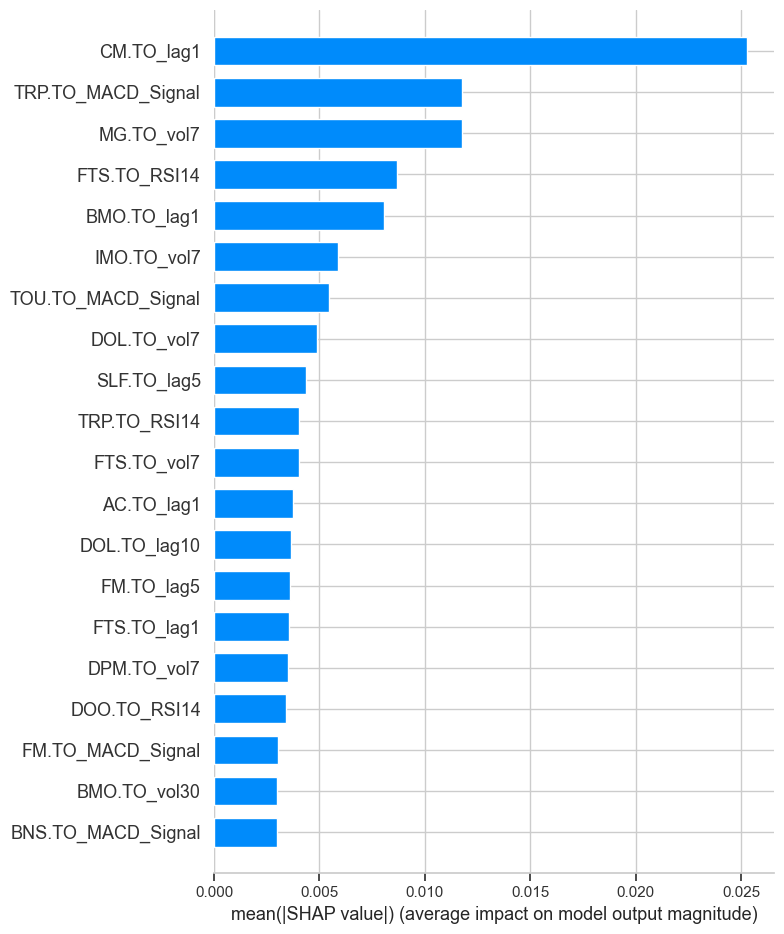

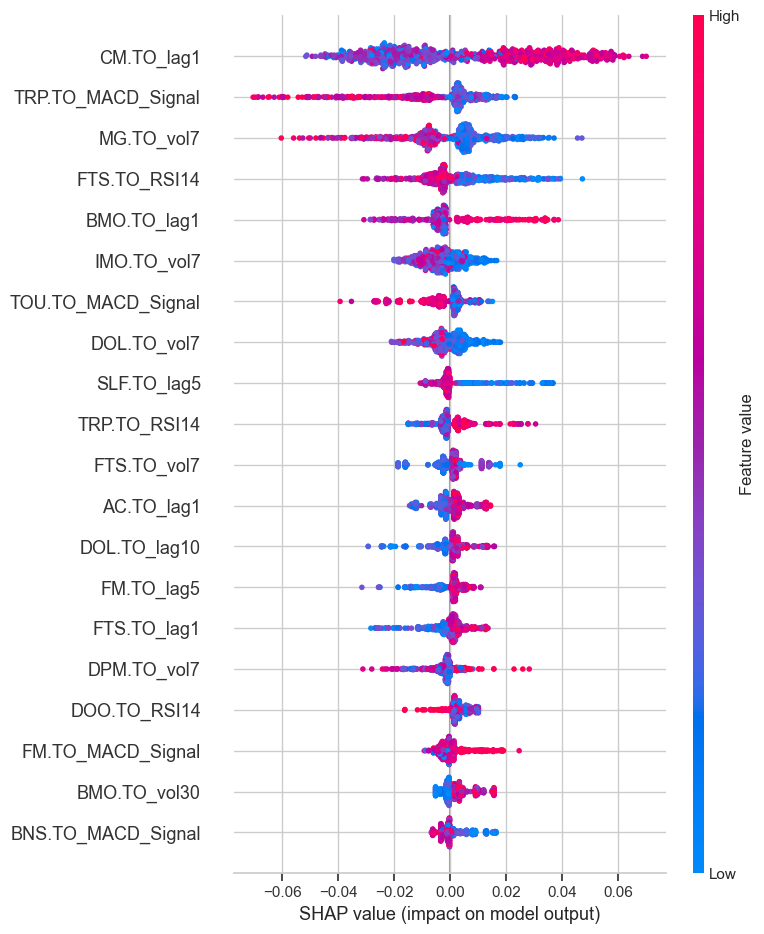

In [19]:
# LightGBM Model Training with Optimized Parameters

# Optimized parameters from Optuna
best_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': 0.03997,
    'num_leaves': 62,
    'max_depth': 7,
    'min_data_in_leaf': 77,
    'feature_fraction': 0.8379,
    'bagging_fraction': 0.8846,
    'bagging_freq': 9,
    'lambda_l1': 4.491,
    'lambda_l2': 4.250,
    'verbose': -1
}

# Retrain final model
final_train_data = lgb.Dataset(X_train_res, label=y_train_res)
final_test_data = lgb.Dataset(X_test_scaled, label=y_test, reference=final_train_data)

final_model = lgb.train(
    best_params,
    final_train_data,
    num_boost_round=500,
    valid_sets=[final_train_data, final_test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
)

# Predictions
y_pred_prob_final = final_model.predict(X_test_scaled)
y_pred_final = (y_pred_prob_final > 0.5).astype(int)

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Final Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# -------------------------------
# SHAP Explainability
# -------------------------------
import shap

explainer_final = shap.TreeExplainer(final_model)
shap_values_final = explainer_final.shap_values(X_test_scaled)

# Global feature importance (bar plot)
shap.summary_plot(shap_values_final, X_test, plot_type="bar")

# Detailed feature effects (beeswarm)
shap.summary_plot(shap_values_final, X_test)


In [20]:
# Save Final Model and Scaler for Deployment
import joblib

# Save LightGBM model
joblib.dump(final_model, "lgb_final_model.pkl")

# Save Scaler
joblib.dump(scaler, "scaler.pkl")

# Deployment Prediction Function
def predict_new_data(new_data):
    """
    Predict up/down movement for TD.TO on new stock data.
    new_data: pd.DataFrame with same features as training data
    """
    # Apply scaling
    X_scaled = scaler.transform(new_data)
    
    # Predict probability
    y_prob = final_model.predict(X_scaled)
    
    # Convert to class labels
    y_pred = (y_prob > 0.5).astype(int)
    return y_pred, y_prob


# Predictive Modeling of Top 50 Canadian Stocks (2010–2025)
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## Project Overview
This project aims to develop a predictive system for the **TD.TO stock movement** (up/down) using historical data of the top 50 Canadian stocks. The workflow ensures **robustness, interpretability, and compliance with industry standards**, making it suitable for deployment and benchmarking.

---

## Dataset
- **Source:** Top 50 Canadian stocks (2010–2025)  
- **Columns:** 41 columns including stock tickers like TD.TO, SHOP.TO, RY.TO, etc.  
- **Rows:** 3,919 daily entries  
- **Target:** Binary movement of TD.TO (Up = 1, Down = 0)  

---

## Methodology

### 1. Data Loading & Cleaning
- Loaded the dataset using `pandas`  
- Converted `Date` column to `datetime` and set as index  
- Dropped columns with excessive missing values: `['SHOP.TO', 'G.TO', 'QSR.TO', 'LSPD.TO', 'ATZ.TO']`  
- Imputed remaining missing values using forward fill  

### 2. Exploratory Data Analysis (EDA)
- Examined **summary statistics** and missing values  
- Identified distribution, trends, and correlations among stocks  
- Visualized stock movements, volatility, and inter-stock correlations  

### 3. Feature Engineering
- Generated **technical indicators** for each stock:  
  - Moving averages (MA), Exponential moving averages (EMA), MACD, RSI, Bollinger Bands, etc.  
- Included **rolling statistics** over various windows (mean, std, min, max)  
- Final feature matrix: 504 features  

### 4. Target Variable
- Defined binary movement of TD.TO:  
  - Up = 1, Down = 0  
- Target distribution before balancing: ~54% Up, ~46% Down  

### 5. Train-Test Split
- Split dataset: 80% training, 20% testing  
- Maintained temporal order to prevent data leakage  

### 6. Handling Class Imbalance
- Applied **SMOTE** to balance the training set:  
  - Up = Down = 1,691 samples  

### 7. Model Development
- **Model:** LightGBM (Gradient Boosting)  
- Initial training yielded F1 ~0.53, accuracy ~0.53  
- Addressed class imbalance with SMOTE → F1 improved  
- **Hyperparameter Optimization:**  
  - Used **Optuna** to tune `learning_rate`, `num_leaves`, `max_depth`, regularization, and subsampling parameters  
  - Best trial parameters:  
    ```
    learning_rate: 0.03997
    num_leaves: 62
    max_depth: 7
    min_data_in_leaf: 77
    feature_fraction: 0.8379
    bagging_fraction: 0.8846
    bagging_freq: 9
    lambda_l1: 4.491
    lambda_l2: 4.250
    ```
- **Final Model Performance (Test Set):**  
  - Accuracy: 0.55  
  - Precision: 0.59  
  - Recall: 0.62  
  - F1 Score: 0.605  
  - Confusion Matrix:  
    ```
    [[159 184]
     [166 268]]
    ```

### 8. Model Interpretability
- Applied **SHAP** for feature importance:  
  - **Summary bar plot:** Shows most influential features globally  
  - **Beeswarm plot:** Visualizes individual feature impact on predictions  
- Ensures regulatory compliance and transparent decision-making  

### 9. Deployment
- Final LightGBM model and `StandardScaler` saved using `joblib`  
- Deployment function accepts new stock data and outputs **predicted movement** and **probability**  

```python
# Example usage:
y_pred, y_prob = predict_new_data(new_data)
